In [12]:
# Yelp reviews classification with advanced ML

### Topics covered in this notebook

- **Tokenization**: breaking text into tokens (words, sentences, n-grams)
- **Stopword removal**: a/an/the
- **Stemming and lemmatization**: root word
- **TF-IDF**: word importance
- **Spelling correction**: "New York City"
- **Language detection**: "translate this page"
- **Machine learning**

## 1: Reading in the Yelp Reviews

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
import nltk
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [15]:
# read yelp.csv into a DataFrame
#from google.colab import drive
#drive.mount('/gdrive')

In [16]:
yelp = pd.read_csv('yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [17]:
yelp.shape

(10000, 10)

In [18]:
# create a new DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]
#yelp_best_worst = yelp

In [19]:
# define X and y
X = yelp_best_worst.text
y = yelp_best_worst.stars

In [20]:
# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [21]:
X_train.shape

(3064,)

In [22]:
X_test.shape

(1022,)

## 2: Tokenization

- **What:** Separate text into units such as sentences or words
- **Why:** Gives structure to previously unstructured text
- **Notes:** Relatively easy with English language text, not easy with some languages

In [23]:
X_train

6841    FILLY-B's!!!!!  only 8 reviews?? NINE now!!!\n...
1728    My husband and I absolutely LOVE this restaura...
3853    We went today after lunch. I got my usual of l...
671     Totally dissapointed.  I had purchased a coupo...
4920    Costco Travel - My husband and I recently retu...
                              ...                        
9396    Pros: \n-No breed restrictions on dogs\n-Washe...
2661    Sorry Banana Leaf... I'm usually not picky at ...
9756    Alright this is the deal of deals, 2.75 for st...
554     Hands down a great lil joint! Gotta get the gu...
2575    Absolutely disgusting.  I had enchiladas and a...
Name: text, Length: 3064, dtype: object

In [1]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer(ngram_range=(1, 1),stop_words='english',lowercase=True,min_df=3)

NameError: name 'CountVectorizer' is not defined

In [25]:
#Tokenisation and Vectorisation
vect.fit(X_train)

CountVectorizer(min_df=3, stop_words='english')

In [26]:
print(vect.get_feature_names())

['00', '000', '00am', '00pm', '01', '07', '09', '10', '100', '1000', '101', '10am', '10min', '10th', '11', '110', '11am', '11pm', '12', '120', '13', '14', '15', '150', '16', '160', '17', '18', '180', '19', '1980', '1st', '20', '200', '2006', '2008', '2009', '2010', '2011', '2012', '20th', '21', '22', '23', '24', '24th', '25', '250', '26', '26th', '28', '29', '2am', '2nd', '2pm', '30', '300', '30am', '30pm', '32', '34', '35', '35th', '3am', '3pm', '3rd', '40', '400', '43', '45', '45min', '48th', '49', '4pm', '4th', '50', '500', '51', '53', '55', '5pm', '5th', '60', '65', '6pm', '70', '70s', '75', '7am', '7pm', '7th', '80', '80s', '85', '88', '8pm', '8th', '90', '90s', '95', '98', '99', 'aaron', 'ability', 'able', 'abroad', 'absolute', 'absolutely', 'absurd', 'abundance', 'ac', 'accent', 'accept', 'acceptable', 'accepted', 'access', 'accessories', 'accommodate', 'accommodating', 'accommodations', 'accomodating', 'accompanied', 'accompany', 'accomplish', 'according', 'account', 'accurate'

In [27]:
len(vect.get_feature_names())

6060

In [28]:
X_train_dtm = vect.transform(X_train)

In [29]:
X_train_dtm

<3064x6060 sparse matrix of type '<class 'numpy.int64'>'
	with 130840 stored elements in Compressed Sparse Row format>

In [30]:
type(X_train_dtm)

scipy.sparse.csr.csr_matrix

In [31]:
X_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
demo = pd.DataFrame(X_train_dtm.toarray())
demo.columns = vect.get_feature_names()
demo

,00,000,00am,00pm,01,07,09,10,100,1000,...,yummm,yummy,yup,zen,zero,zinburger,zone,zoo,zucchini,zumba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3060,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X_test_dtm = vect.transform(X_test)

In [34]:
X_test_dtm

<1022x6060 sparse matrix of type '<class 'numpy.int64'>'
	with 42452 stored elements in Compressed Sparse Row format>

In [35]:
demotest = pd.DataFrame(X_test_dtm.toarray())
demotest.columns = vect.get_feature_names()
demotest

,00,000,00am,00pm,01,07,09,10,100,1000,...,yummm,yummy,yup,zen,zero,zinburger,zone,zoo,zucchini,zumba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- **ngram_range:** tuple (min_n, max_n)
- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [36]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2),stop_words='english',lowercase=True)
vect.fit(X_train)
print(len(vect.get_feature_names()))

150034


In [37]:
# last 50 features
print(vect.get_feature_names()[0:10000])

['00', '00 00', '00 15', '00 24', '00 25', '00 30', '00 50', '00 actually', '00 amazing', '00 arriving', '00 bar', '00 charge', '00 cheese', '00 cover', '00 credit', '00 did', '00 dinner', '00 dish', '00 drink', '00 entree', '00 everyday', '00 extra', '00 food', '00 free', '00 fries', '00 frustrated', '00 gift', '00 glass', '00 lb', '00 like', '00 mediocre', '00 minimum', '00 monday', '00 night', '00 nordstrom', '00 pair', '00 pizza', '00 pm', '00 price', '00 promised', '00 really', '00 right', '00 saturday', '00 seating', '00 seriously', '00 services', '00 seven', '00 simple', '00 sinful', '00 soup', '00 started', '00 stunned', '00 suggest', '00 thing', '00 tip', '00 turkey', '00 wait', '00 wish', '000', '000 miles', '000 numbers', '000 people', '000 stayed', '000 store', '000 thats', '000 trip', '00a', '00a seeing', '00am', '00am 00pm', '00am fax', '00am following', '00am waited', '00am walked', '00pm', '00pm guy', '00pm information', '00pm oops', '00pm seated', '00pm water', '01', '

In [38]:
X_train

6841    FILLY-B's!!!!!  only 8 reviews?? NINE now!!!\n...
1728    My husband and I absolutely LOVE this restaura...
3853    We went today after lunch. I got my usual of l...
671     Totally dissapointed.  I had purchased a coupo...
4920    Costco Travel - My husband and I recently retu...
                              ...                        
9396    Pros: \n-No breed restrictions on dogs\n-Washe...
2661    Sorry Banana Leaf... I'm usually not picky at ...
9756    Alright this is the deal of deals, 2.75 for st...
554     Hands down a great lil joint! Gotta get the gu...
2575    Absolutely disgusting.  I had enchiladas and a...
Name: text, Length: 3064, dtype: object

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
vect = CountVectorizer(stop_words='english',lowercase=True,min_df=10)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape)
print(X_test_dtm.shape)
from sklearn.linear_model import LogisticRegression
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
print("Number of Features")
print(X_train_dtm.shape[1])
print("Training Accuracy")
print(nb.score(X_train_dtm,y_train))
print("Testing Accuracy")
print(nb.score(X_test_dtm,y_test))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_class))
print("Classifcation Report")
print(classification_report(y_test,y_pred_class))

(3064, 2336)
(1022, 2336)
Number of Features
2336
Training Accuracy
0.9513707571801566
Testing Accuracy
0.913894324853229
Confusion Matrix
[[151  33]
 [ 55 783]]
Classifcation Report
              precision    recall  f1-score   support

           1       0.73      0.82      0.77       184
           5       0.96      0.93      0.95       838

    accuracy                           0.91      1022
   macro avg       0.85      0.88      0.86      1022
weighted avg       0.92      0.91      0.92      1022



In [28]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipe = Pipeline((  
("vect",CountVectorizer(stop_words='english',lowercase=True)),
("nb",MultinomialNB()) ,    
))
pipe.fit(X_train,y_train)
y_pred_class = pipe.predict(X_test)

print("Training Accuracy")
print(pipe.score(X_train,y_train))
print("Testing Accuracy")
print(pipe.score(X_test,y_test))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_class))
print("Classifcation Report")
print(classification_report(y_test,y_pred_class))

Training Accuracy
0.7914666666666667
Testing Accuracy
0.4672
Confusion Matrix
[[ 56  20  24  59  26]
 [ 23  21  38 130  22]
 [  6   6  37 270  46]
 [  7   1  16 635 225]
 [ 10   4  10 389 419]]
Classifcation Report
              precision    recall  f1-score   support

           1       0.55      0.30      0.39       185
           2       0.40      0.09      0.15       234
           3       0.30      0.10      0.15       365
           4       0.43      0.72      0.54       884
           5       0.57      0.50      0.53       832

    accuracy                           0.47      2500
   macro avg       0.45      0.34      0.35      2500
weighted avg       0.46      0.47      0.43      2500



### 7. Building a Deep Learning Model

In [32]:
yelp = pd.read_csv('yelp.csv')
yelp.head()
yelp_best_worst = yelp
yelp_best_worst['stars']=yelp_best_worst['stars'].apply(lambda x: x-1)
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,1.000000,0.000000
75%,4.000000,1.000000,2.000000,1.000000
max,4.000000,77.000000,76.000000,57.000000


In [33]:
# define X and y
X = yelp_best_worst.text
y = yelp_best_worst.stars

In [34]:
# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [35]:
vect = CountVectorizer(ngram_range=(1, 2),stop_words='english',lowercase=True,min_df=10)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
print("Number of Features")
print(X_train_dtm.shape[1])

Number of Features
6772


In [106]:
import tensorflow as tf

We will use CountVectorizer features in this case. This can be replaced by TF-IDF features

In [111]:
#Start building a Keras Sequential Model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

In [112]:
X_train[3]

"Rosie, Dakota, and I LOVE Chaparral Dog Park!!! It's very convenient and surrounded by a lot of paths, a desert xeriscape, baseball fields, ballparks, and a lake with ducks.\n\nThe Scottsdale Park and Rec Dept. does a wonderful job of keeping the park clean and shaded.  You can find trash cans and poopy-pick up mitts located all over the park and paths.\n\nThe fenced in area is huge to let the dogs run, play, and sniff!"

In [113]:
y_train[3]

array([0., 0., 0., 0., 1.], dtype=float32)

In [114]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)

In [115]:
y_train[3]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [116]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((6772,),input_shape=(6772,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

In [117]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 6772)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 6772)              27088     
_________________________________________________________________
dense (Dense)                (None, 100)               677300    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
Total params: 705,453
Trainable params: 691,909
Non-trainable params: 13,544
_________________________________________________________________


In [266]:
adam_op = tf.keras.optimizers.Adam(lr=0.001)
#model.compile(optimizer=adam_op, loss='binary_crossentropy', metrics=['acc'])
model.compile(optimizer=adam_op, loss='categorical_crossentropy', metrics=[tf.keras.metrics.Recall()])

In [267]:
#X_train_ct_array = X_train_ct.toarray()
#X_test_ct_array = X_test_ct.toarray()

In [270]:
model.fit(X_train_dtm.toarray(), y_train,
           validation_data=(X_test_dtm.toarray(), y_test), 
           epochs=50, batch_size=128)

Epoch 1/50
59/59 [==============================] - 1s 11ms/step - loss: 0.4011 - recall: 0.8221 - val_loss: 3.5646 - val_recall: 0.4176
Epoch 2/50
59/59 [==============================] - 1s 12ms/step - loss: 0.3700 - recall: 0.8228 - val_loss: 3.4450 - val_recall: 0.4104
Epoch 3/50
59/59 [==============================] - 1s 11ms/step - loss: 0.3584 - recall: 0.8361 - val_loss: 3.3972 - val_recall: 0.4256
Epoch 4/50
59/59 [==============================] - 1s 11ms/step - loss: 0.3606 - recall: 0.8249 - val_loss: 3.3644 - val_recall: 0.4068
Epoch 5/50
59/59 [==============================] - 1s 13ms/step - loss: 0.3646 - recall: 0.8263 - val_loss: 3.3406 - val_recall: 0.4156
Epoch 6/50
59/59 [==============================] - 1s 11ms/step - loss: 0.3390 - recall: 0.8387 - val_loss: 3.3316 - val_recall: 0.4116
Epoch 7/50
59/59 [==============================] - 1s 11ms/step - loss: 0.3586 - recall: 0.8277 - val_loss: 3.2625 - val_recall: 0.4272
Epoch 8/50
59/59 [=======================

In [36]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    vect.fit(X_train)
    X_train_dtm = vect.transform(X_train)
    print ('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print("Training Accuracy")
    print(nb.score(X_train_dtm,y_train))
    print("Testing Accuracy")
    print(nb.score(X_test_dtm,y_test))
    print("Confusion Matrix")
    print(confusion_matrix(y_test,y_pred_class))
    print("Classifcation Report")
    print(classification_report(y_test,y_pred_class))

In [37]:
# include 1-grams and 2-grams
#vect = CountVectorizer(stop_words='english')
vect = CountVectorizer(ngram_range=(1, 2),stop_words='english',min_df=3)
tokenize_test(vect)

Features:  28847
Training Accuracy
0.9008
Testing Accuracy
0.5048
Confusion Matrix
[[ 78  40  17  31  19]
 [ 36  39  56  80  23]
 [ 14  20  81 196  54]
 [  9   3  44 565 263]
 [ 12   4  16 301 499]]
Classifcation Report
              precision    recall  f1-score   support

           0       0.52      0.42      0.47       185
           1       0.37      0.17      0.23       234
           2       0.38      0.22      0.28       365
           3       0.48      0.64      0.55       884
           4       0.58      0.60      0.59       832

    accuracy                           0.50      2500
   macro avg       0.47      0.41      0.42      2500
weighted avg       0.49      0.50      0.49      2500



## 3: Stopword Removal

- **What:** Remove common words that will likely appear in any text
- **Why:** They don't tell you much about your text

In [38]:
# show vectorizer options
vect

CountVectorizer(min_df=3, ngram_range=(1, 2), stop_words='english')

- **stop_words:** string {'english'}, list, or None (default)
- If 'english', a built-in stop word list for English is used.
- If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
- If None, no stop words will be used. 

In [39]:
vect = CountVectorizer(stop_words='english')

In [40]:
# set of stop words
print(vect.get_stop_words())

frozenset({'each', 'be', 'or', 'yourselves', 'inc', 'side', 'someone', 'sometime', 'so', 'find', 'you', 'beyond', 'do', 'to', 'up', 'thence', 'my', 'also', 'with', 're', 'whatever', 'our', 'four', 'that', 'somewhere', 'moreover', 'thereby', 'were', 'hasnt', 'eight', 'part', 'yet', 'twelve', 'together', 'have', 'among', 'very', 'again', 'elsewhere', 'last', 'go', 'may', 'might', 'interest', 'him', 'cannot', 'made', 'any', 'whom', 'everywhere', 'done', 'much', 'something', 'as', 'but', 'thru', 'most', 'else', 'whence', 'will', 'these', 'after', 'co', 'her', 'which', 'seems', 'almost', 'cant', 'an', 'towards', 'himself', 'former', 'twenty', 'ten', 'noone', 'through', 'by', 'can', 'those', 'front', 'everything', 'always', 'ie', 'ours', 'whereas', 'when', 'herein', 'two', 'across', 'out', 'yours', 'nevertheless', 'their', 'whenever', 'what', 'me', 'become', 'is', 'thereafter', 'whereafter', 'the', 'because', 'while', 'fifteen', 'often', 'until', 'they', 'throughout', 'otherwise', 'latter', 

In [41]:
len(vect.get_stop_words())

318

In [46]:
# remove English stop words
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)

Features:  25496
Training Accuracy
0.7914666666666667
Testing Accuracy
0.4672
Confusion Matrix
[[ 56  20  24  59  26]
 [ 23  21  38 130  22]
 [  6   6  37 270  46]
 [  7   1  16 635 225]
 [ 10   4  10 389 419]]
Classifcation Report
              precision    recall  f1-score   support

           0       0.55      0.30      0.39       185
           1       0.40      0.09      0.15       234
           2       0.30      0.10      0.15       365
           3       0.43      0.72      0.54       884
           4       0.57      0.50      0.53       832

    accuracy                           0.47      2500
   macro avg       0.45      0.34      0.35      2500
weighted avg       0.46      0.47      0.43      2500



In [47]:
# without stopwords, dtm size
vect = CountVectorizer()
vect.fit(X_train)
vect.transform(X_train)

<7500x25797 sparse matrix of type '<class 'numpy.int64'>'
	with 622700 stored elements in Compressed Sparse Row format>

In [48]:
# with stopwords, dtm size
vect = CountVectorizer(stop_words='english')
vect.fit(X_train)
vect.transform(X_train)

<7500x25496 sparse matrix of type '<class 'numpy.int64'>'
	with 378882 stored elements in Compressed Sparse Row format>

In [49]:
my_additional_stop_words = ['place','zumba']

In [50]:
from sklearn.feature_extraction import text 
my_stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

In [51]:
len(my_stop_words)

320

In [52]:
# with stopwords, dtm size
vect = CountVectorizer(stop_words=my_stop_words)
vect.fit(X_train)
vect.transform(X_train)

<7500x25494 sparse matrix of type '<class 'numpy.int64'>'
	with 375648 stored elements in Compressed Sparse Row format>

In [195]:
# remove updated stop words 
vect = CountVectorizer(stop_words=my_stop_words)
tokenize_test(vect)

Features:  25494
Training Accuracy
0.7924
Testing Accuracy
0.4672
Confusion Matrix
[[ 58  20  26  57  24]
 [ 24  22  37 130  21]
 [  6   5  36 273  45]
 [  7   1  16 633 227]
 [ 10   5   9 389 419]]
Classifcation Report
              precision    recall  f1-score   support

           1       0.55      0.31      0.40       185
           2       0.42      0.09      0.15       234
           3       0.29      0.10      0.15       365
           4       0.43      0.72      0.54       884
           5       0.57      0.50      0.53       832

    accuracy                           0.47      2500
   macro avg       0.45      0.35      0.35      2500
weighted avg       0.46      0.47      0.43      2500



## 4: Other CountVectorizer Options

- **max_features:** int or None, default=None
- If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

In [196]:
# remove English stop words and only keep 100 features
vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect)

Features:  100
Training Accuracy
0.4688
Testing Accuracy
0.4516
Confusion Matrix
[[ 61  21  15  49  39]
 [ 54  36  28  71  45]
 [ 22  28  62 185  68]
 [ 33  24  60 472 295]
 [ 34  17  14 269 498]]
Classifcation Report
              precision    recall  f1-score   support

           1       0.30      0.33      0.31       185
           2       0.29      0.15      0.20       234
           3       0.35      0.17      0.23       365
           4       0.45      0.53      0.49       884
           5       0.53      0.60      0.56       832

    accuracy                           0.45      2500
   macro avg       0.38      0.36      0.36      2500
weighted avg       0.43      0.45      0.43      2500



In [197]:
# all 100 features
print(vect.get_feature_names())

['amazing', 'area', 'atmosphere', 'awesome', 'bad', 'bar', 'beer', 'best', 'better', 'big', 'bit', 'bread', 'burger', 'came', 'cheese', 'chicken', 'coffee', 'come', 'day', 'definitely', 'delicious', 'did', 'didn', 'dinner', 'don', 'drink', 'drinks', 'eat', 'experience', 'favorite', 'feel', 'food', 'fresh', 'friendly', 'fries', 'going', 'good', 'got', 'great', 'happy', 'home', 'hot', 'hour', 'just', 'know', 'like', 'little', 'll', 'location', 'long', 'looking', 'lot', 'love', 'lunch', 'make', 'meal', 'menu', 'minutes', 'new', 'nice', 'night', 'order', 'ordered', 'people', 'phoenix', 'pizza', 'place', 'pretty', 'price', 'prices', 'really', 'restaurant', 'right', 'said', 'salad', 'sandwich', 'sauce', 'say', 'service', 'small', 'staff', 'stars', 'sure', 'sweet', 'table', 'tasty', 'thing', 'things', 'think', 'time', 'times', 'try', 've', 'wait', 'want', 'wasn', 'way', 'went', 'wine', 'worth']


In [198]:
# include 1-grams and 2-grams, and limit the number of features
vect = CountVectorizer(ngram_range=(1, 2), max_features=100000)
tokenize_test(vect)

Features:  100000
Training Accuracy
0.9398666666666666
Testing Accuracy
0.4868
Confusion Matrix
[[ 51  16  16  73  29]
 [ 21  17  30 143  23]
 [  1   3  26 293  42]
 [  0   0   9 659 216]
 [  4   0   0 364 464]]
Classifcation Report
              precision    recall  f1-score   support

           1       0.66      0.28      0.39       185
           2       0.47      0.07      0.13       234
           3       0.32      0.07      0.12       365
           4       0.43      0.75      0.55       884
           5       0.60      0.56      0.58       832

    accuracy                           0.49      2500
   macro avg       0.50      0.34      0.35      2500
weighted avg       0.49      0.49      0.44      2500



- **min_df:** float in range [0.0, 1.0] or int, default=1
- When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts.

In [199]:
# include 1-grams and 2-grams, and only include terms that appear at least 2 times
vect = CountVectorizer(ngram_range=(1, 2), min_df=2)
tokenize_test(vect)

Features:  95504
Training Accuracy
0.9410666666666667
Testing Accuracy
0.4908
Confusion Matrix
[[ 58  16  19  63  29]
 [ 24  22  30 135  23]
 [  1   3  32 285  44]
 [  0   1  10 649 224]
 [  4   0   0 362 466]]
Classifcation Report
              precision    recall  f1-score   support

           1       0.67      0.31      0.43       185
           2       0.52      0.09      0.16       234
           3       0.35      0.09      0.14       365
           4       0.43      0.73      0.55       884
           5       0.59      0.56      0.58       832

    accuracy                           0.49      2500
   macro avg       0.51      0.36      0.37      2500
weighted avg       0.50      0.49      0.45      2500



##  5: Introduction to TextBlob

TextBlob: "Simplified Text Processing"

In [43]:
# print the first review
print (yelp_best_worst.text[0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [44]:
yelp_best_worst.stars[0]

5

In [45]:
# save it as a TextBlob object
review = TextBlob(yelp_best_worst.text[0])

In [46]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Sayan
[nltk_data]     Dey\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [47]:
# list the words
review.words

WordList(['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excellent', 'The', 'weather', 'was', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'grounds', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'was', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fills', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'was', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'was', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'looks', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'eggs', 

In [48]:
# list the sentences
review.sentences

[Sentence("My wife took me here on my birthday for breakfast and it was excellent."),
 Sentence("The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure."),
 Sentence("Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning."),
 Sentence("It looked like the place fills up pretty quickly so the earlier you get here the better."),
 Sentence("Do yourself a favor and get their Bloody Mary."),
 Sentence("It was phenomenal and simply the best I've ever had."),
 Sentence("I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it."),
 Sentence("It was amazing."),
 Sentence("While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious."),
 Sentence("It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete."),
 Sentence("It was the best "toast" I've ever had."),


In [59]:
# some string methods are available
review.lower()

TextBlob("my wife took me here on my birthday for breakfast and it was excellent.  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  our waitress was excellent and our food arrived quickly on the semi-busy saturday morning.  it looked like the place fills up pretty quickly so the earlier you get here the better.

do yourself a favor and get their bloody mary.  it was phenomenal and simply the best i've ever had.  i'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  it was amazing.

while everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  it was the best "toast" i've ever had.

anyway, i can't wait to go back!")

##  6: Stemming and Lemmatization

**Stemming:**

- **What:** Reduce a word to its base/stem/root form
- **Why:** Often makes sense to treat related words the same way
- **Notes:**
    - Uses a "simple" and fast rule-based approach
    - Stemmed words are usually not shown to users (used for analysis/indexing)
    - Some search engines treat words with the same stem as synonyms

In [208]:
review.words

WordList(['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excellent', 'The', 'weather', 'was', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'grounds', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'was', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fills', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'was', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'was', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'looks', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'eggs', 

In [209]:
# initialize stemmer
stemmer = SnowballStemmer('english')

In [210]:
# stem each word
print ([stemmer.stem(word) for word in review.words])

['my', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excel', 'the', 'weather', 'was', 'perfect', 'which', 'made', 'sit', 'outsid', 'overlook', 'their', 'ground', 'an', 'absolut', 'pleasur', 'our', 'waitress', 'was', 'excel', 'and', 'our', 'food', 'arriv', 'quick', 'on', 'the', 'semi-busi', 'saturday', 'morn', 'it', 'look', 'like', 'the', 'place', 'fill', 'up', 'pretti', 'quick', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'bloodi', 'mari', 'it', 'was', 'phenomen', 'and', 'simpli', 'the', 'best', 'i', 've', 'ever', 'had', 'i', "'m", 'pretti', 'sure', 'they', 'onli', 'use', 'ingredi', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'it', 'was', 'amaz', 'while', 'everyth', 'on', 'the', 'menu', 'look', 'excel', 'i', 'had', 'the', 'white', 'truffl', 'scrambl', 'egg', 'veget', 'skillet', 'and', 'it', 'was', 'tasti', 'and', 'delic

**Lemmatization**

- **What:** Derive the canonical form ('lemma') of a word
- **Why:** Can be better than stemming
- **Notes:** Uses a dictionary-based approach (slower than stemming)

In [211]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sayan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [212]:
# assume every word is a noun
print ([word.lemmatize() for word in review.words])

['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'wa', 'excellent', 'The', 'weather', 'wa', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'wa', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'wa', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredient', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'wa', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'look', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'egg', 'vegetable', 'skill

In [213]:
# assume every word is a verb
print ([word.lemmatize(pos='v') for word in review.words])

['My', 'wife', 'take', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'be', 'excellent', 'The', 'weather', 'be', 'perfect', 'which', 'make', 'sit', 'outside', 'overlook', 'their', 'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'be', 'excellent', 'and', 'our', 'food', 'arrive', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'look', 'like', 'the', 'place', 'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'be', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'have', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'be', 'amaze', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'look', 'excellent', 'I', 'have', 'the', 'white', 'truffle', 'scramble', 'egg', 'vegetable', 'skillet', 'and'

In [214]:
# define a function that accepts text and returns a list of lemmas
def split_into_lemmas(text):
    text = text.lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [215]:
split_into_lemmas

<function __main__.split_into_lemmas(text)>

In [216]:
# use split_into_lemmas as the feature extraction function (WARNING: SLOW!)
vect = CountVectorizer(analyzer=split_into_lemmas,stop_words='english',ngram_range=(1, 1),min_df=5)
#vect = CountVectorizer(stop_words='english',ngram_range=(1, 1),min_df=1)

In [217]:
tokenize_test(vect)

Features:  6845
Training Accuracy
0.7425333333333334
Testing Accuracy
0.498
Confusion Matrix
[[ 93  40  25  13  14]
 [ 53  65  67  36  13]
 [ 24  29 122 148  42]
 [ 22  20  83 498 261]
 [ 28  14  25 298 467]]
Classifcation Report
              precision    recall  f1-score   support

           1       0.42      0.50      0.46       185
           2       0.39      0.28      0.32       234
           3       0.38      0.33      0.36       365
           4       0.50      0.56      0.53       884
           5       0.59      0.56      0.57       832

    accuracy                           0.50      2500
   macro avg       0.46      0.45      0.45      2500
weighted avg       0.50      0.50      0.49      2500



## 7: Term Frequency-Inverse Document Frequency (TF-IDF)

- **What:** Computes "relative frequency" that a word appears in a document compared to its frequency across all documents
- **Why:** More useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents)
- **Notes:** Used for search engine scoring, text summarization, document clustering

In [218]:
# example documents
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [219]:
# Term Frequency
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [220]:
# Document Frequency
vect = CountVectorizer(binary=True)
df = vect.fit_transform(simple_train).toarray().sum(axis=0)
pd.DataFrame(df.reshape(1, 6), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,1,3,2,1,1,1


In [221]:
# TfidfVectorizer
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


## Classify Yelp Review with TFIDF?

1. Separate data into train and test

2. Create DTM using TFIDF

3. Build classification model with Naive Bayes

4. Calculate classification score

5. Compare it with CountVectorizer

6. Lemmatization Vs. Stemming when using in TFIDF

## 9: Sentiment Analysis

In [61]:
review = TextBlob("Sayan is teaching amazingly well !!!")

In [62]:
print (review)

Sayan is teaching amazingly well !!!


In [63]:
# polarity ranges from -1 (most negative) to 1 (most positive)
review.sentiment.polarity

1.0

In [58]:
yelp_best_worst.head(20)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


In [59]:
# save it as a TextBlob object
review = TextBlob(yelp_best_worst.text[12])

In [60]:
print (review)

They have a limited time thing going on right now with BBQ chicken pizza (not sure how long it's going to last) but let me just say it was amazing.  Probably THE best BBQ Chicken pizza I have ever had.  I have tried other things too, like the tomato basil soup, and many of their sandwiches ... very good, very fresh - every time.  

The 5 stars is for the pizza, but if I were to rate Jason's Deli over all they would get about a 4.


In [61]:
# polarity ranges from -1 (most negative) to 1 (most positive)
review.sentiment.polarity

0.15302197802197803

In [62]:
# understanding the apply method
yelp['length'] = yelp.text.apply(len)
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [63]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [64]:
# create a new DataFrame column for sentiment (WARNING: SLOW!)
yelp['sentiment'] = yelp.text.apply(detect_sentiment)

In [85]:
yelp[yelp['stars']==1]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,sentiment
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594,-0.264021
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361,-0.099091
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198,-0.035973
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569,-0.015278
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498,-0.063456
...,...,...,...,...,...,...,...,...,...,...,...,...
9924,mhQCxOiqp03qnhGRTtPduw,2012-07-07,PCjnn__E8AzNa2kXFXxTHQ,1,Horrible service.,review,rvaJcf5OIY2So_pkoqDHLQ,0,1,0,17,-1.000000
9931,C_eWAEOvkHZ_IZYGwjtpmg,2011-04-25,QfdoE-XqEeCsttJH8g0ugQ,1,I love Saddle Ranch for its casual night time ...,review,yhGfcKunPjcy-v-1ppr6oQ,0,2,0,995,-0.064238
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,2,0,296,0.049074
9984,wepFVY82q_tuDzG6lQjHWw,2012-02-12,spusZYROtBKw_5tv3gYm4Q,1,Went last night to Whore Foods to get basics t...,review,W7zmm1uzlyUkEqpSG7PlBw,0,1,2,1673,-0.071673


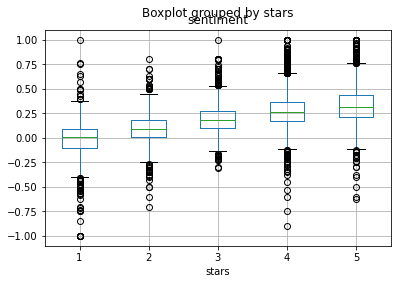

In [86]:
# box plot of sentiment grouped by stars
yelp.boxplot(column='sentiment', by='stars')

In [87]:
onestar = yelp[yelp['stars']==1]
onestar.describe()

,stars,cool,useful,funny,length,sentiment
count,749.0,749.000000,749.000000,749.000000,749.000000,749.000000
mean,1.0,0.576769,1.604806,1.056075,826.515354,-0.017906
std,0.0,1.474759,2.302354,2.480309,742.929304,0.210476
min,1.0,0.000000,0.000000,0.000000,11.000000,-1.000000
25%,1.0,0.000000,0.000000,0.000000,315.000000,-0.103379
50%,1.0,0.000000,1.000000,0.000000,600.000000,0.008523
75%,1.0,1.000000,2.000000,1.000000,1075.000000,0.094707
max,1.0,17.000000,20.000000,30.000000,4618.000000,1.000000


In [88]:
onestar[onestar['sentiment']==1].values

array([['iHmfkYeEsIxbAqEj3dloQQ', '2012-07-03', 'N_hL1-fyunhVpDDX6fz9Sg',
        1,
        "The owner has changed hands & this place isn't what it used to be.  If you want up to date paper & quality product...go to Scrap Happy OR Crop Girls!",
        'review', 'HY9A-ShZQ1MvdFvEhNY4LQ', 0, 1, 0, 149, 1.0]],
      dtype=object)

In [89]:
# reviews with most positive sentiment
yelp[yelp.sentiment == 1].text.head()

254    Our server Gary was awesome. Food was amazing....
347    3 syllables for this place. \nA-MAZ-ING!\n\nTh...
420                                    LOVE the food!!!!
459    Love it!!! Wish we still lived in Arizona as C...
679                                     Excellent burger
Name: text, dtype: object

In [90]:
# reviews with most negative sentiment
yelp[yelp.sentiment == -1].text.head()

773     This was absolutely horrible. I got the suprem...
1517                  Nasty workers and over priced trash
3266    Absolutely awful... these guys have NO idea wh...
4766                                       Very bad food!
5812        I wouldn't send my worst enemy to this place.
Name: text, dtype: object

In [91]:
# widen the column display
pd.set_option('max_colwidth', 500)

In [94]:
# negative sentiment in a 5-star review
yelp[(yelp.stars == 1) & (yelp.sentiment > 0.5)].head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,sentiment
1781,53YGfwmbW73JhFiemNeyzQ,2012-06-22,Gi-4O3EhE175vujbFGDIew,1,If you like the stuck up Scottsdale vibe this is a good place for you. The food isn't impressive. Nice outdoor seating.,review,Hqgx3IdJAAaoQjvrUnbNvw,0,1,2,119,0.766667
2353,3Srfy_VeCgwDbo4iyUFOtw,2006-08-23,K8tXedC2NMBEZ8p77zg23Q,1,"My co-workers and I refer to this place as ""Pizza n' Ants"". The staff will be happy to serve you with bare hands, right after using the till. Also, as the nickname suggests, there has been a noticable insect problem. \n\n\n\nAs if that could all be overlooked, the pizza isn't even good. If you are in this part of town, go to Z Pizza or Slices for great pizza instead!",review,rPGZttaVjRoVi3GYbs62cg,0,1,0,368,0.567143
5257,cXx-fHY11Se8rFHkkUeaUg,2009-10-27,2yHyr0N_XNZggmIfZ7JaHw,1,"Remember how I said that the Trivia was the best thing about this place? Well, they got rid of long time Triva host, Dave (who had been featured in the College Times and was the best thing about the trivia). Without Dave's personality, this place just doesn't cut it. Will never go here again. Bummer.",review,nx2PS25Qe3MCEFUdO_XOtw,2,4,0,304,0.650000
6222,fDZzCjlxaA4OOmnFO-i0vw,2012-07-09,F5aRE4oqmHthiHudmnShLQ,1,"My mother always told me, if I didn't have anything nice to say, say nothing!",review,J92bzxYVmyoLHULzh9xNCA,1,2,1,77,0.750000
6702,77oW-QeIXbUoTbUbrdD2aA,2012-01-05,oVYk9Gxa3TY63FAeoeCEzg,1,Most livable city my eye!\nPlastic yuppies around every corner looking for a reason to belong. I can't wait for the homosexuals to take control of this dog park and give it some class.\n\nAvoid at all cost.,review,ek4GWXatDshMorJwGC2JAw,1,2,4,204,0.625000


In [131]:
# positive sentiment in a 1-star review
yelp[(yelp.stars == 1) & (yelp.sentiment > 0.5)].head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,sentiment
1781,53YGfwmbW73JhFiemNeyzQ,2012-06-22,Gi-4O3EhE175vujbFGDIew,1,If you like the stuck up Scottsdale vibe this is a good place for you. The food isn't impressive. Nice outdoor seating.,review,Hqgx3IdJAAaoQjvrUnbNvw,0,1,2,119,0.766667
2353,3Srfy_VeCgwDbo4iyUFOtw,2006-08-23,K8tXedC2NMBEZ8p77zg23Q,1,"My co-workers and I refer to this place as ""Pizza n' Ants"". The staff will be happy to serve you with bare hands, right after using the till. Also, as the nickname suggests, there has been a noticable insect problem. \n\n\n\nAs if that could all be overlooked, the pizza isn't even good. If you are in this part of town, go to Z Pizza or Slices for great pizza instead!",review,rPGZttaVjRoVi3GYbs62cg,0,1,0,368,0.567143
5257,cXx-fHY11Se8rFHkkUeaUg,2009-10-27,2yHyr0N_XNZggmIfZ7JaHw,1,"Remember how I said that the Trivia was the best thing about this place? Well, they got rid of long time Triva host, Dave (who had been featured in the College Times and was the best thing about the trivia). Without Dave's personality, this place just doesn't cut it. Will never go here again. Bummer.",review,nx2PS25Qe3MCEFUdO_XOtw,2,4,0,304,0.650000
6222,fDZzCjlxaA4OOmnFO-i0vw,2012-07-09,F5aRE4oqmHthiHudmnShLQ,1,"My mother always told me, if I didn't have anything nice to say, say nothing!",review,J92bzxYVmyoLHULzh9xNCA,1,2,1,77,0.750000
6702,77oW-QeIXbUoTbUbrdD2aA,2012-01-05,oVYk9Gxa3TY63FAeoeCEzg,1,Most livable city my eye!\nPlastic yuppies around every corner looking for a reason to belong. I can't wait for the homosexuals to take control of this dog park and give it some class.\n\nAvoid at all cost.,review,ek4GWXatDshMorJwGC2JAw,1,2,4,204,0.625000


In [132]:
# reset the column display width
pd.reset_option('max_colwidth')

## 10: Adding Features to a Document-Term Matrix

In [133]:
# create a DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

In [134]:
# define X and y
feature_cols = ['text', 'sentiment', 'cool', 'useful', 'funny']
X = yelp_best_worst[feature_cols]
y = yelp_best_worst.stars

In [135]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [136]:
# use CountVectorizer with text column only
vect = CountVectorizer()

In [137]:
X_train_dtm = vect.fit_transform(X_train.text)

In [138]:
X_test_dtm = vect.transform(X_test.text)

In [139]:
print (X_train_dtm.shape)
print (X_test_dtm.shape)

(3064, 16825)
(1022, 16825)


In [140]:
# shape of other four feature columns
X_train.drop('text', axis=1).shape

(3064, 4)

In [141]:
# cast other feature columns to float and convert to a sparse matrix
extra = sp.sparse.csr_matrix(X_train.drop('text', axis=1).astype(float))
extra.shape

(3064, 4)

In [142]:
# combine sparse matrices
X_train_dtm_extra = sp.sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

(3064, 16829)

In [143]:
# repeat for testing set
extra = sp.sparse.csr_matrix(X_test.drop('text', axis=1).astype(float))
X_test_dtm_extra = sp.sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(1022, 16829)

In [144]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print (metrics.accuracy_score(y_test, y_pred_class))

0.9246575342465754


In [145]:
# use logistic regression with all features
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
print (metrics.accuracy_score(y_test, y_pred_class))

0.9207436399217221


## 11: Fun TextBlob Features

In [117]:
# spelling correction
TextBlob('indai is good counrteyz').correct()

TextBlob("india is good counrteyz")

In [120]:
# spellcheck
Word('parot').spellcheck()

[('part', 0.9929478138222849), ('parrot', 0.007052186177715092)]

In [122]:
# definitions
Word('bank').define('v')

['tip laterally',
 'enclose with a bank',
 'do business with a bank or keep an account at a bank',
 'act as the banker in a game or in gambling',
 'be in the banking business',
 'put into a bank account',
 'cover with ashes so to control the rate of burning',
 'have confidence or faith in']

In [65]:
# language identification
TextBlob('விஜய் தனது புதிய யூடியூப் சேனலை திறக்கிறார்').detect_language()

HTTPError: HTTP Error 502: Bad Gateway

## Conclusion

- NLP is a gigantic field
- Understanding the basics broadens the types of data you can work with
- Simple techniques go a long way
- Use scikit-learn for NLP whenever possible